<a href="https://colab.research.google.com/github/AchillesXser/studygo/blob/master/tensorflow%E7%AC%94%E8%AE%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 1.14 回顾


In [ ]:
!pip install tensorflow-gpu==2.1.1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.1.1'

## 常量

### 定义常量

In [ ]:
# 定义Tensorflow常量
tensor = tf.constant([[23,4],[32,51]])

In [ ]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[23,  4],
       [32, 51]], dtype=int32)>

In [ ]:
# tf1.14中，如果session没有初始化，不能获取常量值
tensor.eval()

NotImplementedError: ignored

### 1.14 获取常量值的方法

In [ ]:
# 开启一个会话 tf1.14才有手动开启Session
session = tf.Session()
session.run(tf.global_variables_initializer())
tensor_value = session.run(tensor)
tensor_value

AttributeError: ignored

## 变量

In [ ]:
# 定义一个变量
variable = tf.Variable([[30,20],[10,45]])

In [ ]:
variable

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[30, 20],
       [10, 45]], dtype=int32)>

如果是tensorflow 1.14, 那么上面直接variable是获取不到上面的值

In [ ]:
# tensorflow 1.14 需要使用eval()获取值
variable.eval()

RuntimeError: ignored

## tf1.14获取变量值的方法

In [ ]:
# 初始化session会话
session = tf.Session()

# 从session中初始化全局变量
session.run(tf.global_variables_initializer)

variable.eval(session)

AttributeError: ignored

# Tensorflow 2.1.1

In [ ]:
# 导入tensorflow2.1.1
import tensorflow as tf

# 导入numpy
import numpy as np

tf.__version__

'2.1.1'

## 2.1.1常量

In [ ]:
# 定义常量
tensor_211 = tf.constant([[23,4],[32,51]])

tensor_211

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[23,  4],
       [32, 51]], dtype=int32)>

In [ ]:
# 获取tensor211常量的形状
tensor_211.shape

TensorShape([2, 2])

In [ ]:
# 使用numpy而非session即可获取到tensor211的值
tensor_211.numpy()

array([[23,  4],
       [32, 51]], dtype=int32)

In [ ]:
# 可以将一个numpy array转换成一个tensor 张量
# 先定义一个numpy array
numpy_tensor = np.array([[23,4],[32,51]])

In [ ]:
# 将numpy array传入constant中作为参数
tensor_from_numpy = tf.constant(numpy_tensor)

In [ ]:
tensor_from_numpy

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[23,  4],
       [32, 51]])>

## 2.1.1变量

In [ ]:
# 定义变量
tf2_variable = tf.Variable([[1., 2., 3.], [4., 5., 6.,]])
tf2_variable

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
# 获取变量值
tf2_variable.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
# 改变特定值 只能在变量中时候用，因为constant不能被改变
tf2_variable[0, 2].assign(100)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1.,   2., 100.],
       [  4.,   5.,   6.]], dtype=float32)>

## 张量运算

In [ ]:
# 首先声明一个常量张量, 既可以是常量张量，也可以是变量张量
# 虽然constant原值不能被改变，但仍然可以参与运算
tensor = tf.constant([[1,2], [3,4]])
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

## 张量的加法

In [ ]:
# 张量加一个简单的标量
tensor + 2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 4],
       [5, 6]], dtype=int32)>

## 张量和标量的乘法

In [ ]:
tensor * 2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 4],
       [6, 8]], dtype=int32)>

## 使用numpy函数对张量进行运算

In [ ]:
# 对张量中的每个单元进行平方操作, 返回一个新张量
np.square(tensor)

array([[ 1,  4],
       [ 9, 16]], dtype=int32)

In [ ]:
# 对张量中的每个单元进行开方操作，返回一个新张量
np.sqrt(tensor)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

你还可以使用numpy的其他函数，比如指数、对数操作对张量进行计算

## 对两个张量进行点积运算



In [ ]:
tensor1 = tf.Variable([[1,2], [3,4]])
tensor2 = tf.constant([[10,20],[30,40]])

np.dot(tensor1, tensor2)

array([[ 70, 100],
       [150, 220]], dtype=int32)

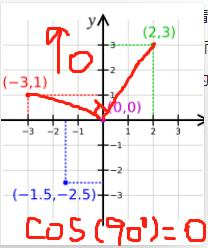


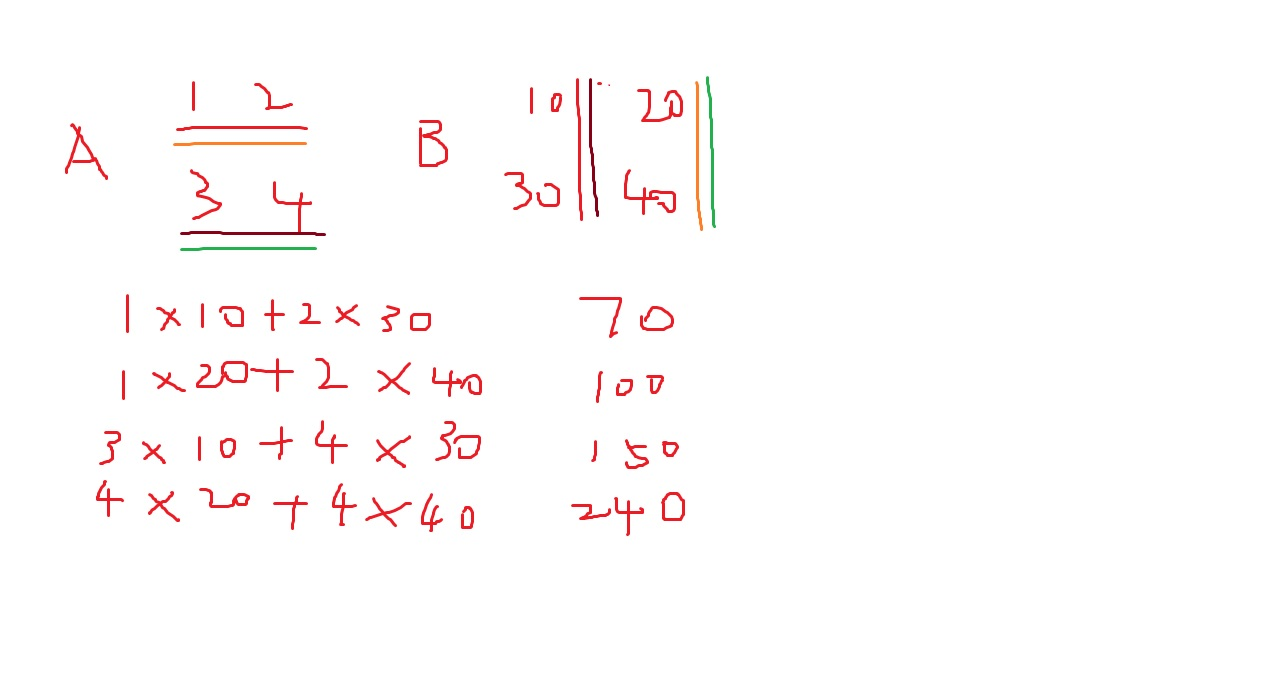

## 字符串

In [ ]:
# 定义TF字符串常量 如果需要进行自然语言分析可能会用到字符串常量
import tensorflow as tf
tf_string = tf.constant("TensorFlow")
tf_string

<tf.Tensor: shape=(), dtype=string, numpy=b'TensorFlow'>

## 简单字符串运算

In [ ]:
# 计算tf string的长度
tf.strings.length(tf_string)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
# 对字符串进行unicode解码
tf.strings.unicode_decode(tf_string, "UTF8")

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 84, 101, 110, 115, 111, 114,  70, 108, 111, 119], dtype=int32)>

## 存储字符串数组

In [ ]:
# 如果你需要用Tensorflow做深度NLP，或简单的NLP，你可能会将字符串置入数组中
tf_string_array = tf.constant(["TensorFlow", "Deep Learning", "AI"])
print(tf_string_array)

# 迭代TF字符串数组
for string in tf_string_array:
  print(string)

tf.Tensor([b'TensorFlow' b'Deep Learning' b'AI'], shape=(3,), dtype=string)
tf.Tensor(b'TensorFlow', shape=(), dtype=string)
tf.Tensor(b'Deep Learning', shape=(), dtype=string)
tf.Tensor(b'AI', shape=(), dtype=string)


# 人工神经网络理论

本节内容：
- 神经元(Neuron)
- 激活函数(Activation Function)
- 神经网络的工作原理
- 了解神经网络是怎么学习的
- 梯度下降算法(Gradient Descent)
- 随机梯度下降算法(Stochastic Gradient Descent)
- 反向传播算法(Backpropagation)

## 神经元


下图是神经元的玻璃切片，经过了染色，可以使用显微镜看清楚

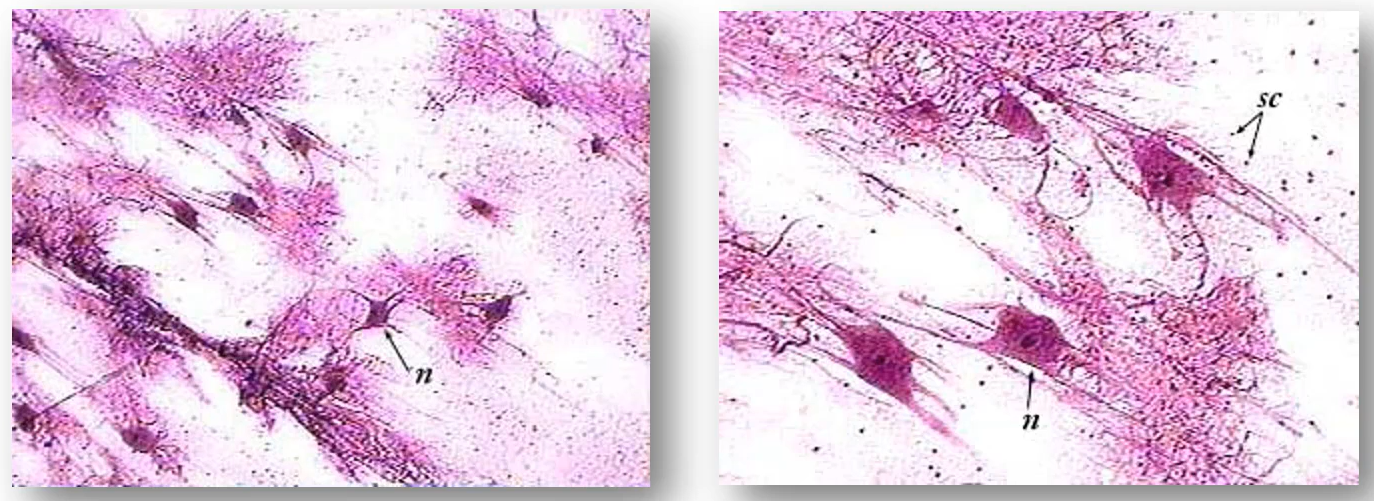

深度学习的目标就是使用机器模拟神经元的工作机制，实现人类大脑的功能，使机器具备自我学习的功能。

# 人工神经网络

## Fashion MNIST数据集
是一个典型的人工神经网络数据集
数据集来源：https://www.kaggle.com
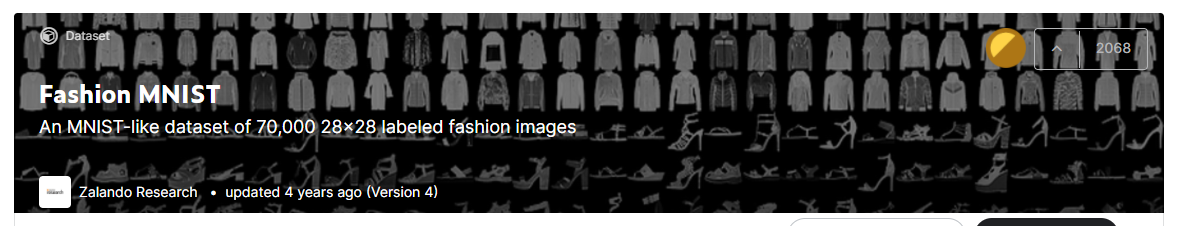

Fashion MNIST 还是一个检测标准，用来测试你构建的神经网络的性能，在使用这个数据集进行训练后，将会得到一个准确率

还可以与其他模型、其他结构的神经网络的准确率进行比较

Fashion MNIST数据集包含70000幅图像，每幅图像尺寸为28*28, 每幅像素是784个

包含训练集60,000 测试集 10,000

包含的内容为
0T恤
1裤子
2套衫
3礼服
4外套
5凉鞋
6衬衫
7运动鞋
8包
9短靴

使用这个数据集的目标是识别这些衣物

神经网络的准确性 = 预测正确的总数 / 测试集中图像总数(10000)

784像素，是一个很重要的数字，神经网络的输入是一维的，是一个一维向量。

而28*28是一个矩阵，所以需要把这个矩阵reshape成784个元素的一维向量。

每一个像素的值都在 0-255之间，也就是我们的训练集和测试集都会有 785列， 每一列与图像中的一个像素对应。

训练集和测试集中的行，就是图像，一行中的不同列，对应的就是一幅图像的每个像素

In [ ]:
# 引入numpy
import numpy as np
# 获取训练中的时间信息
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


## 数据预处理

In [ ]:
# 数据预处理就是将数据处理成神经网络可以接收的格式，包含【加载数据集】、【图像标准化、正态化】、【reshape数据集为一维向量格式】
# reshape数据集为一维向量是【全连接神经网络】要求的格式

# 1、加载数据集
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# X_train 包含 60,000个二维数组，包含图像的所有像素
# X_test 包含 10,000个二维数组，包含测试图像的所有像素
# y_train 是分类信息，就是训练集的目标：识别一个图片的分类
# y_test  是测试集的目标分类

In [ ]:
# 2、图像标准化
# 对图像标准化, 会加快神经网络的训练
# 这里因为每个像素的范围是0-255，对图像进行标准化的方法就是，把每个像素值/255最大像素

# 这里用到了上面讲的张量运算，就是一个张量除以一个标量
X_train = X_train / 255.0
X_test = X_test / 255.0

# 图像的值就会在 0-1之间
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# 3、Reshpe数据集为一维向量
# X_train 和 X_test 都是三维数组，第1个维度是图像的下标，对应指向某一幅图像的索引。第2个维度是图像的每个像素的数组。
# 现在要做的就是压平(flatten)每一幅图像，就是将X_train中的每一个二维数组(共计60,000个)转换成60,000个一维向量。
# 将X_train 压平的结果就是将 三维数组转换成 二维数组，第1维度不变，第二维度是我们处理过的单一向量

X_train = X_train.reshape(-1, 28*28)   # 第二个参数代表压平后希望新的X_train有28*28列
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 60,000行 784列
X_train.shape

(60000, 784)

In [ ]:
# 再对测试集进行数据预处理
X_test = X_test.reshape(-1, 28*28)

X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 构建人工神经网络

In [ ]:
# 定义模型
# 简单定义一个全链接神经网络模型, 全连接神经网络是稠密层的一个序列
model = tf.keras.models.Sequential()

# model基本上是被初始化为层的一个序列
# 我们要做的是在model上一步一步添加神经网络的不同层

## 增加第一个全链接隐藏层

层的超参数：
  - 128个单位的神经元(units)
  - 激活函数: ReLU, 用来破坏神经网络的线性, 以便神经网络可以学习图像像素和表示衣物分类输出之间的非线性关系
  - 输入形状: (784,)

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))